## <font color='blue'>3. Digital Signal</font>
### <font color='blue'>Problem</font>

### 1. What happen of an audio signals when its sampling rate is not enough?
### 2. How to capture audio by a microphone and play it back with some modification?
https://www.youtube.com/watch?v=pmlYiK6fgX0

### <font color='green'>Next: Signal Generation</font>

## <font color='blue'>3-1 Basic Concepts</font>

數位訊號(Digital Signals)可以定義為：「隨著時間改變的離散訊號」，因此也稱為離散時間訊號(Discrete-Time Signals)。

<div>
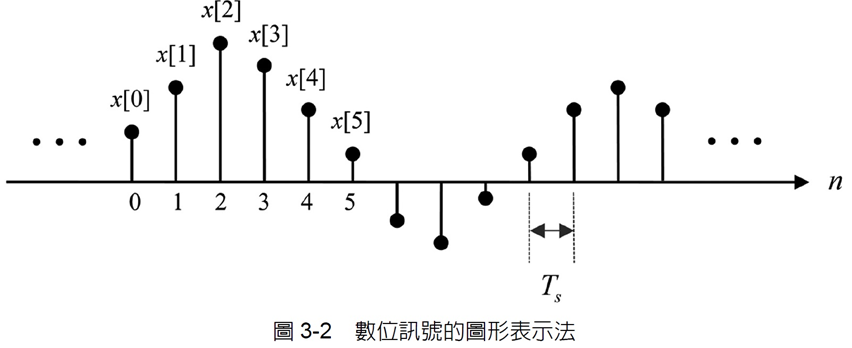
</div>

## <font color='blue'>3-2 Sampling and Quantization</font>
### 類比訊號轉換成數位訊號的過程：取樣(Sampling)、量化(Quantization)。
訊號的取樣(Sampling)可以定義為：
    $X[N]=X(nT_s)$

其中，$T_s$稱為取樣週期(Sampling Period)或取樣間隔(Sampling Interval)，單位為秒。此外，
    $f_s=\frac{1}{T_s}$

稱為取樣頻率(Sampling Frequency)或取樣率(Sampling Rate)。


### <font color='green'>Nyquist-Shannon取樣定理</font>

假設原始訊號為頻帶限制訊號(Band-Limited Signal)，最高頻率為$f_H$，若取樣頻率為$f_s$，則：
                                    $f_s > 2 f_H$
方能保證原始訊號的重建。


<div>
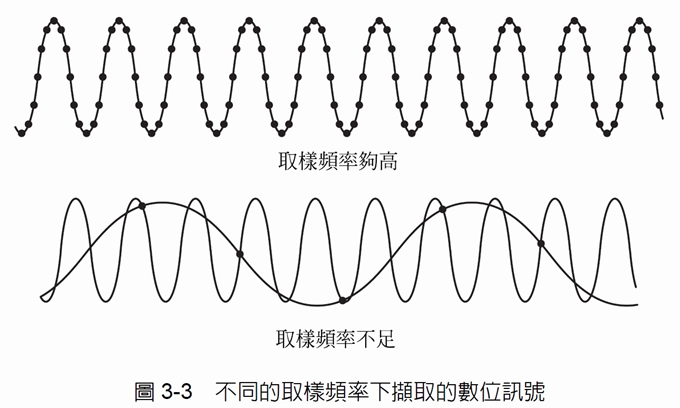
</div>

### Expmple 1: 人類的聽力範圍約為20Hz～20kHz，請決定擷取數位訊號時理想的取樣頻率範圍


訊號的量化(Quantization)是指將訊號的振幅(Amplitude)經過數位化轉換成數值的過程。

量化(Quantization)常用的數值範圍為：

8-bits：可表示的範圍為0～255或–128～127。

16-bits：可表示的範圍為–32,768～32,767。

數位訊號可以表示成離散(Discrete) 的數字集合，定義如下：\
    $x={x[n]},  -\infty < n < \infty$\
    其中，$n$為整數，大括號表示集合。

<div>
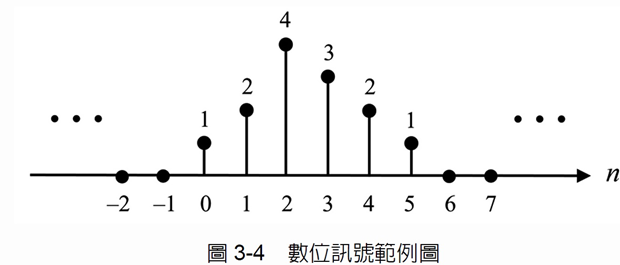
</div>

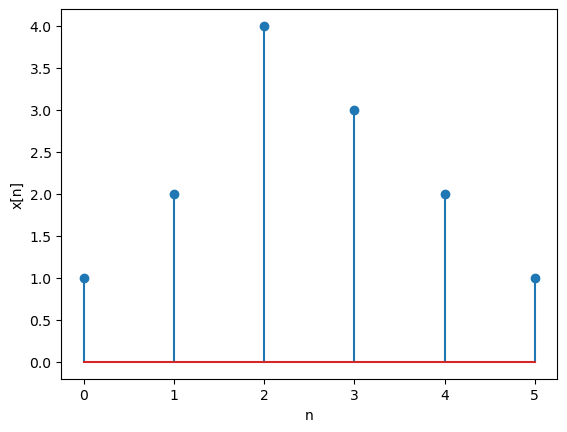

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = np.array( [ 0, 1, 2, 3, 4, 5 ] )# sampling point
x = np.array( [ 1, 2, 4, 3, 2, 1 ] )# generated data

plt.stem( n, x )						# 
plt.xlabel( 'n' )
plt.ylabel( 'x[n]' )
plt.show( )

## <font color='blue'>3-3 Basic Digital Signals</font>
單位脈衝函數(Unit Impulse Function)可以定義為：
\begin{equation}
\delta(t)=0, t\neq 0.  \tag{3.1}
\end{equation}

且  
\begin{equation}
\int_{-\infty}^{\infty} \delta(t)dt=1.  \tag{3.2}
\end{equation}

單位脈衝(Unit Impulse)可以定義為：

\begin{equation}
  \delta[n] =
    \begin{cases}
      1, & n=0\\
      0, & n\neq 0
    \end{cases}      \tag{3.3}  
\end{equation}

<div>
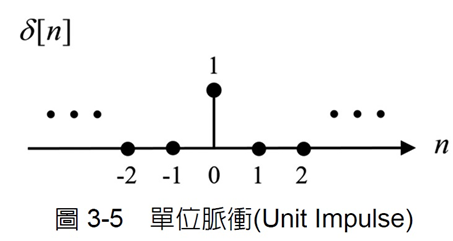
</div>

單位步階函數(Unit Step Function)可以定義為：
\begin{equation}
u(t)=
    \begin{cases}
      1 & t\geq0\\
      0 & t<0
    \end{cases}  \tag{3.4}
\end{equation}

單位步階(Unit Step)可以定義為：

\begin{equation}
u[n]=
    \begin{cases}
      1 & n\geq0\\
      0 & n<0
    \end{cases}  \tag{3.5}
\end{equation}

<div>
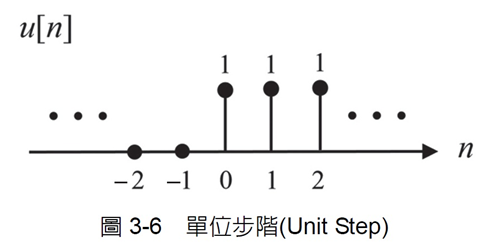
</div>

Hence, a step function can be defined as
$u[n]=\delta[n]+\delta[n-1]+\delta[n-2]+...$

or  

$u[n]=\sum_{k=0}^\infty \delta[n-k]$
also, we can denote an unit pulse as

$\delta[n]=u[n]-u[n-1]$

Therefore, any time series can be defined as

$x[n]=...+x[-1]\delta[n+1]+x[0]\delta[n]+x[1]\delta[n-1]+...$

\begin{equation}
  x[n] = \sum_{k=-\infty}^\infty x[k]\delta[n-k].  \tag{3.6}
\end{equation}

### Expmple 2: Try to represent the digital signal with unit pulses:
$x=\{1,2,3,4,3,2,1\}, n=0,1,2,...,6$

## <font color='blue'>3-4 Sound</font>
wav檔案是根據資源交換檔案格式(Resource Interchange File Format, RIFF)，特別為了存取CD的數位音樂而設計。

<div>
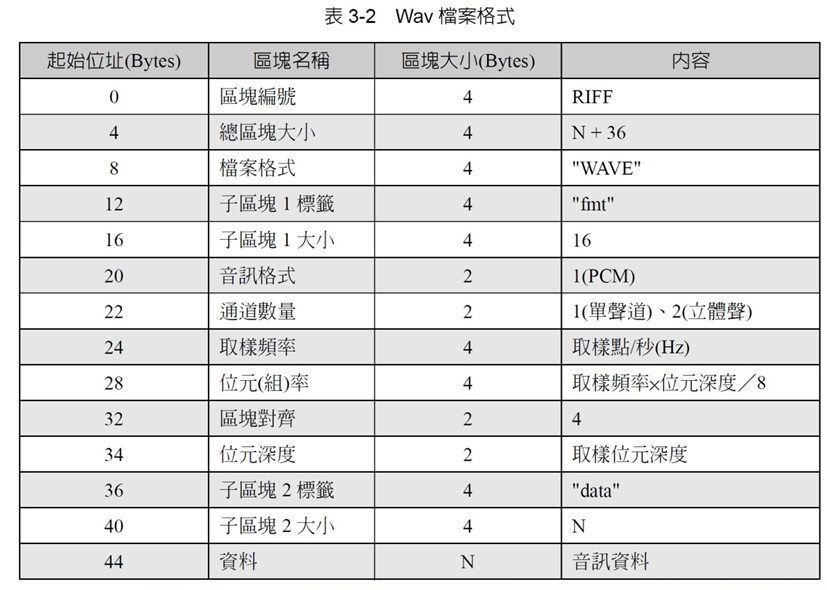
</div>

### <font color='green'>Read a Wave file</font>

In [3]:
# read a wave format
import wave

filename = str(input( "Please enter file name [default: r2d2.wav] : ") or 'r2d2.wav')
wav = wave.open( filename, 'rb' )   # read the specified file  

num_channels = wav.getnchannels()   # number of audio channels (1 for mono, 2 for stereo).
sampwidth	= wav.getsampwidth()	# sample width in bytes.
frame_rate	= wav.getframerate()	# sampling frequency
num_frames	= wav.getnframes()		# number of audio frames 
comptype	= wav.getcomptype()	    # compression type ('NONE' is the only supported type). 
compname	= wav.getcompname()	    # Human-readable version of getcomptype(). Usually 'not compressed' parallels 'NONE'.

print( "Number of Channels =", num_channels )
print( "Sample Width =", sampwidth )
print( "Sampling Rate =", frame_rate )
print( "Number of Frames =", num_frames )
print( "Comptype =", comptype )
print( "Compname =", compname )

# close the wave
wav.close( )

Please enter file name [default: r2d2.wav] :  Hello.wav


Number of Channels = 2
Sample Width = 2
Sampling Rate = 44100
Number of Frames = 78087
Comptype = NONE
Compname = not compressed


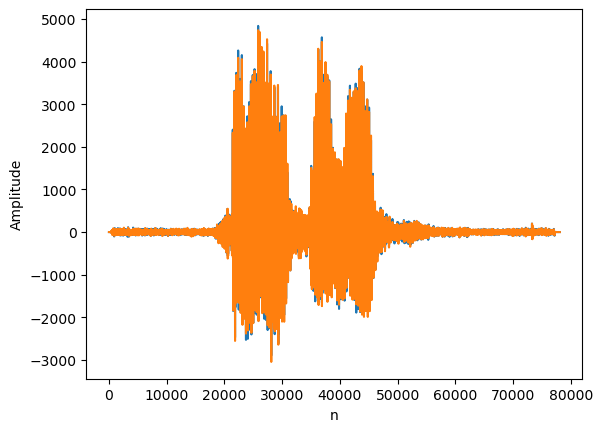

In [4]:
# plot the time series data of the wave file
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

sampling_rate, x = read( filename )
plt.plot(x)
plt.xlabel( 'n' )
plt.ylabel( 'Amplitude' )

plt.show( )

In [10]:
len(x)

220160

In [ ]:
# play the audio 
from IPython.display import Audio

Audio(x, rate=frame_rate, autoplay=True)

In [12]:
# Play.py
import pyaudio
import wave
import sys

# In[]
CHUNK = 1024

filename = str(input( "Please enter file name [default: output.wav] : ") or 'output.wav')
wav = wave.open( filename, 'rb' )   # read the specified file  

pa = pyaudio.PyAudio()

stream = pa.open(format = pa.get_format_from_width(wav.getsampwidth()),
                channels = wav.getnchannels(),
                rate = wav.getframerate(),
                output = True)

data = wav.readframes(CHUNK) # read stream by frames in CHUNK

while data != b'':
    stream.write(data)         # write the audio data to the stream (speaker)
    data = wav.readframes(CHUNK)

# In[]
stream.stop_stream()
stream.close()

pa.terminate()

Please enter file name [default: output.wav] : output.wav


### <font color='green'>Microphone Sample</font>

In [7]:
441000/1024

430.6640625

In [ ]:
# Record & Plot.py: Receive audio data from a microphone, play and plot it
import pyaudio
import time
import matplotlib.pyplot as plt
import numpy as np

WIDTH = 2             
CHANNELS = 2     #number of audio channels (1 for mono, 2 for stereo).
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 5

pa = pyaudio.PyAudio()

# open a microphone as an input stream 
stream = pa.open(format=pa.get_format_from_width(WIDTH), channels=CHANNELS,rate=RATE, 
                input=True, output=True, frames_per_buffer=CHUNK)

stream.start_stream()

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)  # read audio data from the stream (microphone)
    stream.write(data, CHUNK)  # write the audio data to the stream (speaker)
    
    x = np.frombuffer(data, np.int16 )
    plt.clf( )
    plt.plot(x)
    plt.axis([ 0, CHUNK, -30000, 30000 ])
    plt.pause(0.1)

stream.stop_stream()
stream.close()

pa.terminate()

## <font color='blue'>Advance Study</font>
How To Remove Background Noise In Audacity: https://www.youtube.com/watch?v=ZCTUwi7jTao

Active Noise Cancellation – From Modeling to Real-Time Prototyping: https://www.youtube.com/watch?v=mlkAIlL5Bqs

J. Jiang, H. Yang, G. Chen, and K. Wang, "Numerical and experimental analysis on the vibration and radiated noise of the cylinder washing machine,
Applied Acoustics," Vol. 174, 2021.

<div>
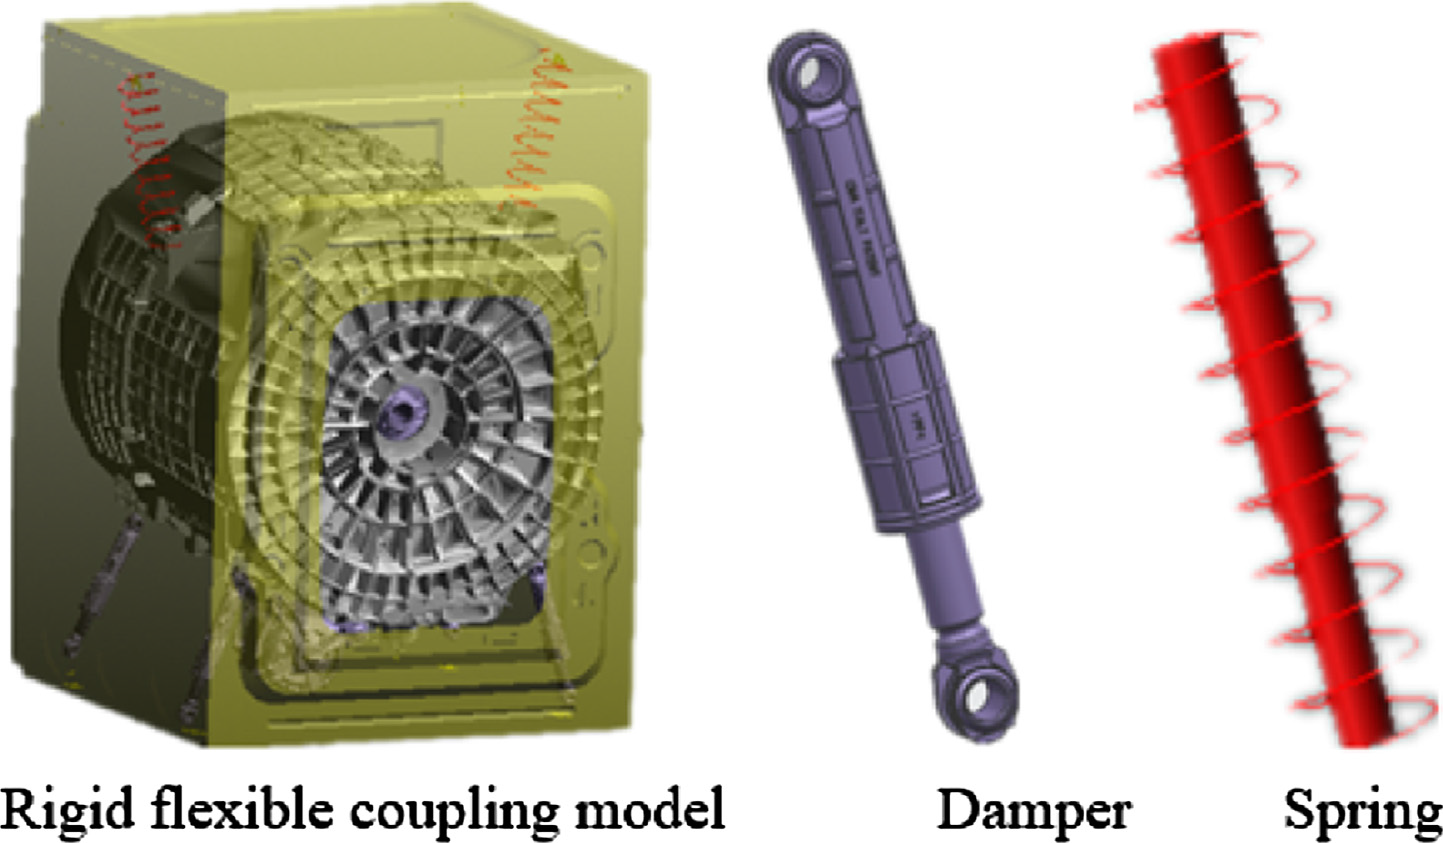
</div>

<div>
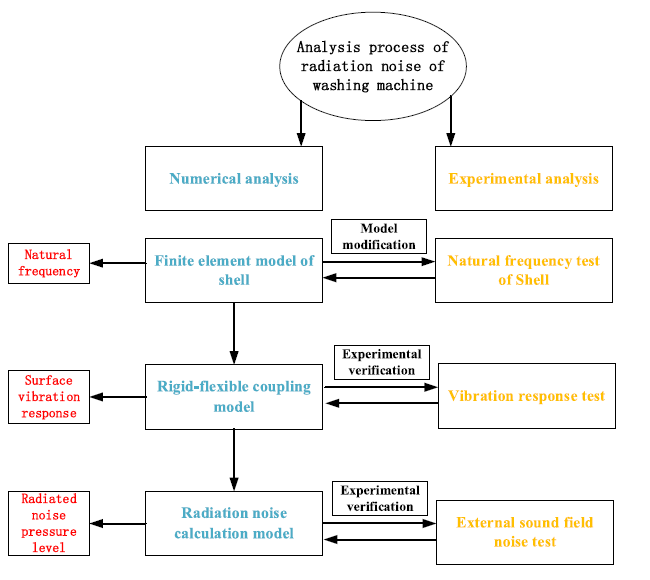
</div>

<div>
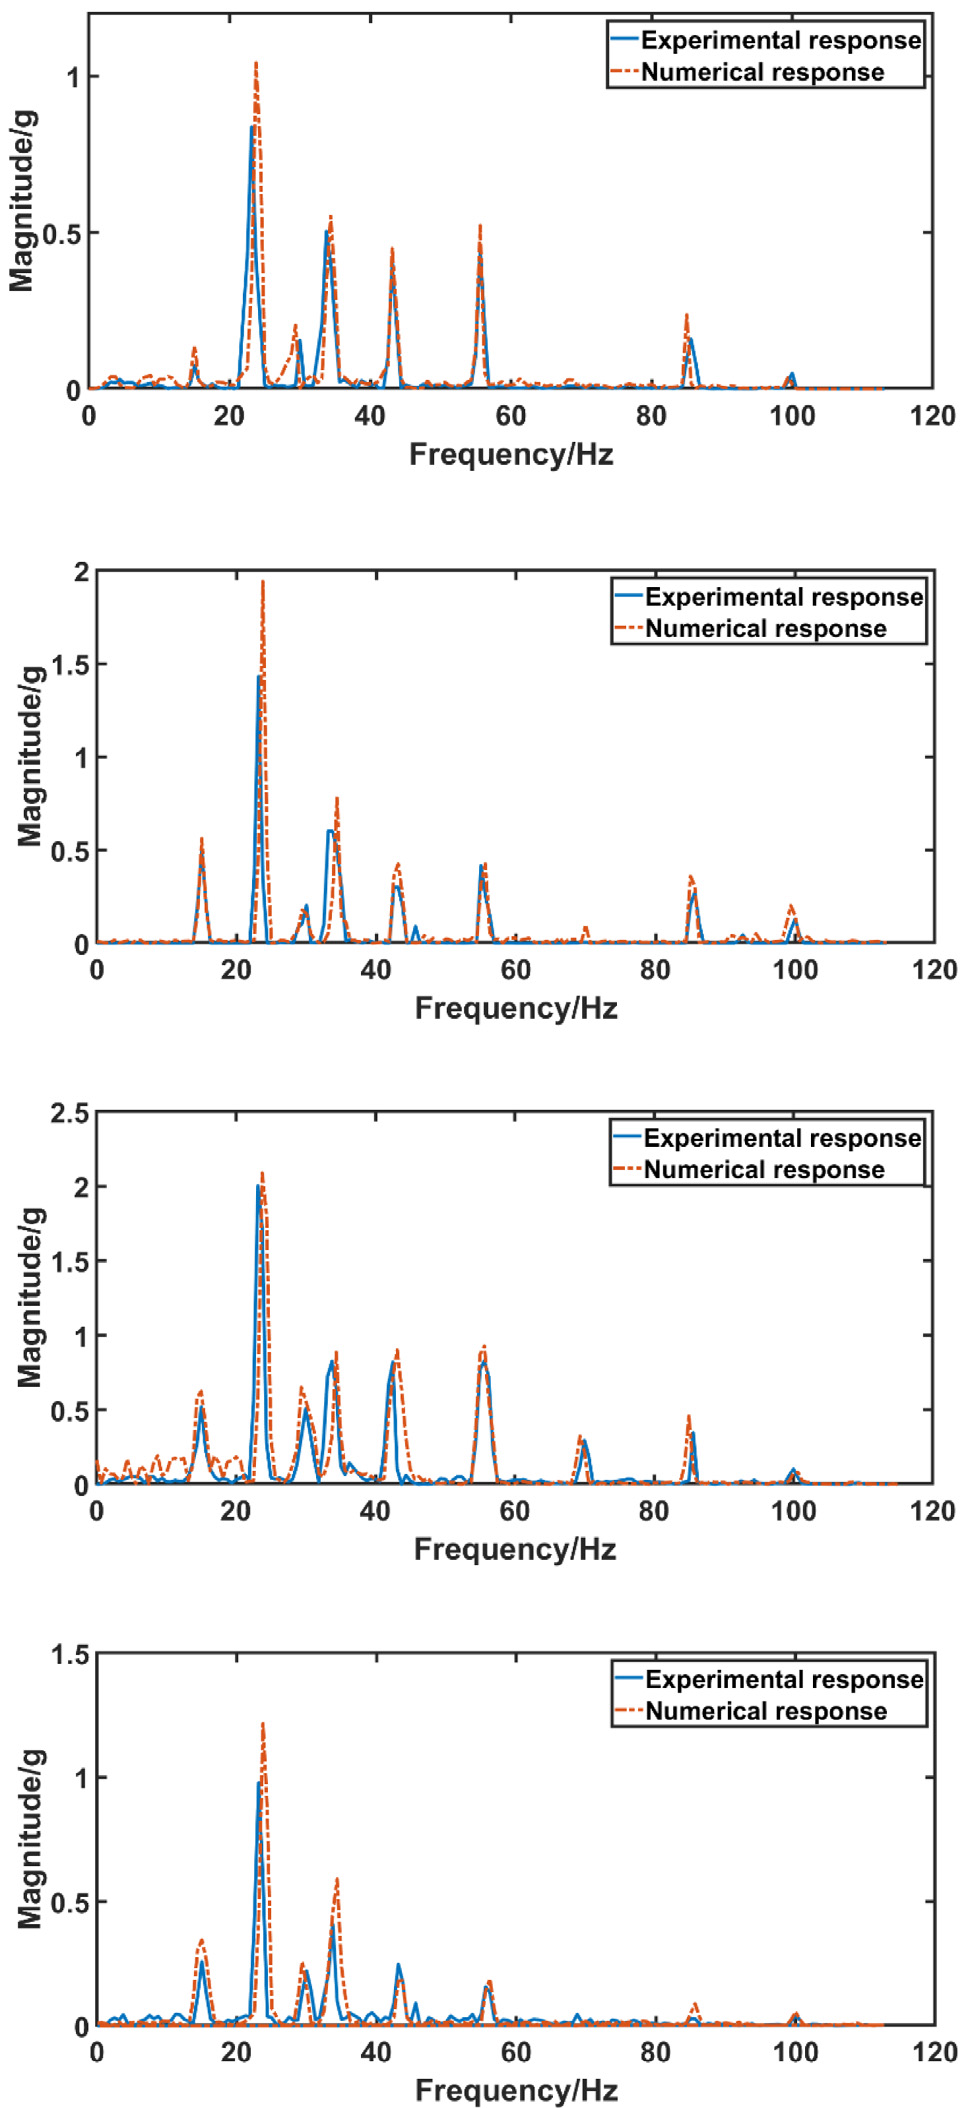
</div>

## <font color='red'> Final Problem:</font>
How to play the received audio without delays?